  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  freetime goout  Dalc  Walc  health  Attendance  G1 Previous_Score  \
0        3     4     1     1       3           6   5              6   
1        3     3     1     1       3           4   5              5   
2        3     2     2     3       3          10   7              8   
3        2     2     1     1       5           2  15             14   
4        3     2     1     2       5           4   6             10   

  exam score Exam_Score  
0         10       pass  
1          6       fail  
2       

C:\Users\arsha\Newfolder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\arsha\Newfolder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\arsha\Newfolder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\arsha\Newfolder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

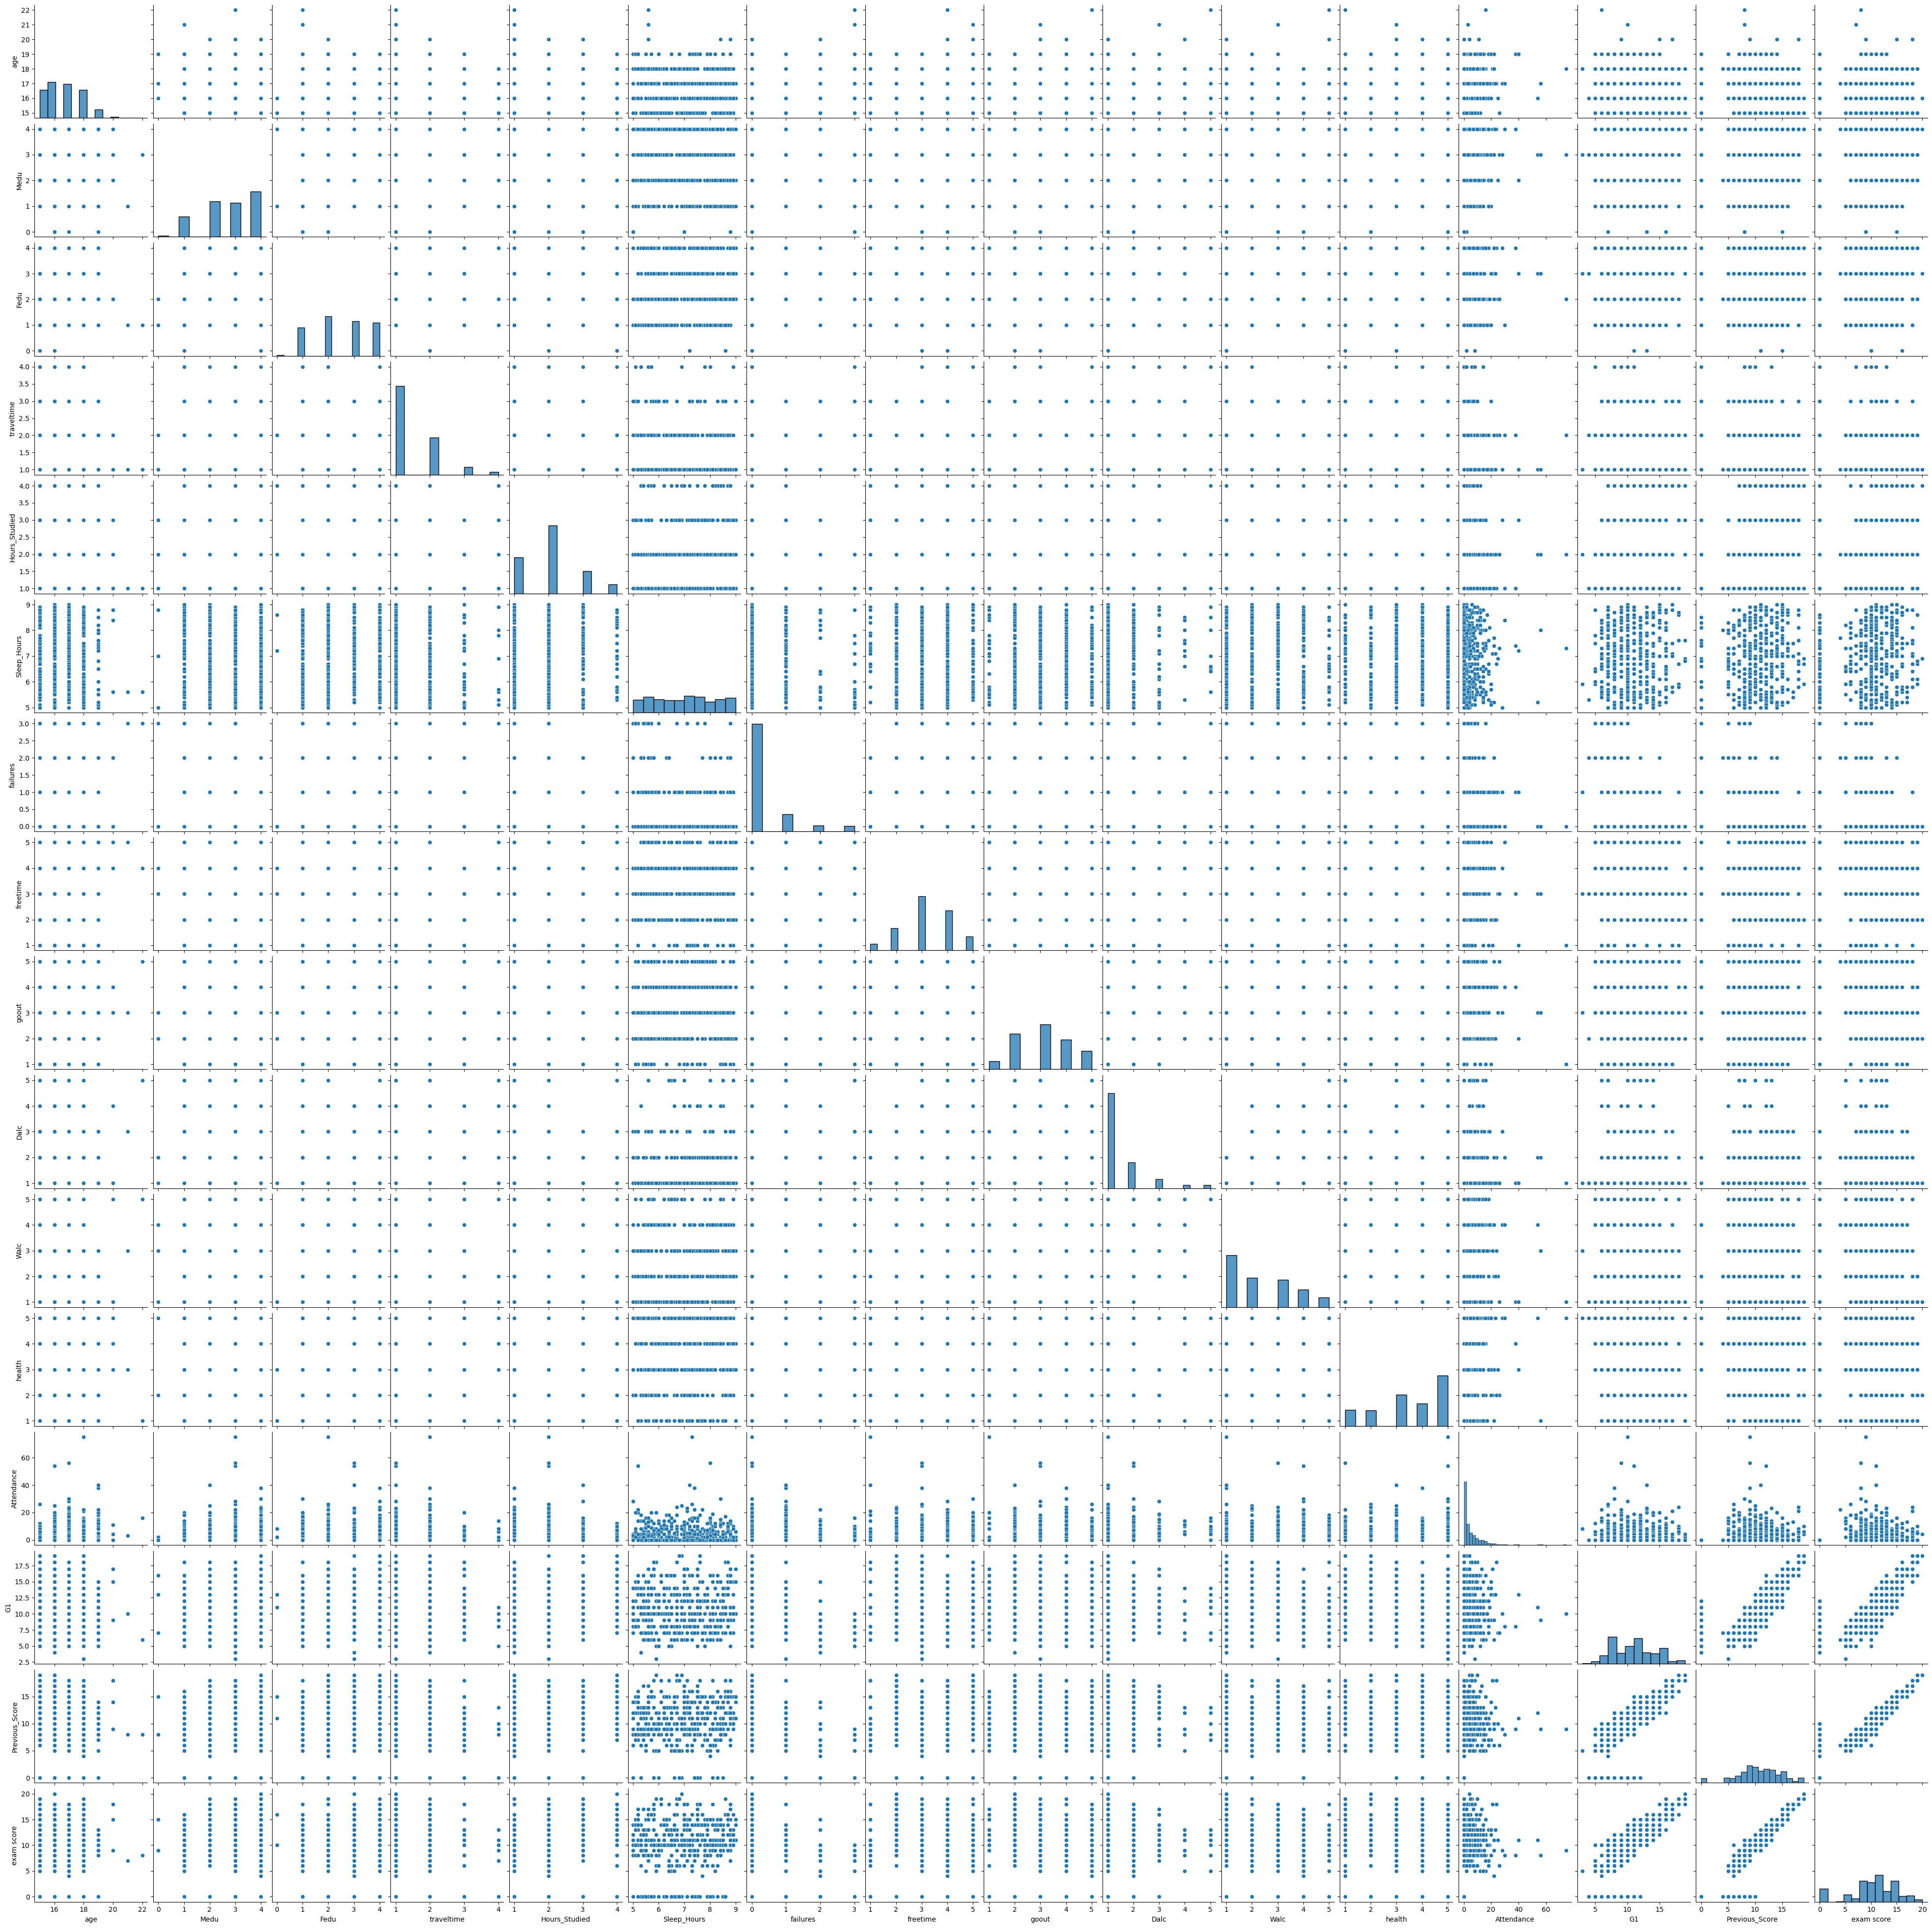

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel(r"C:\Users\arsha\Downloads\student-mat.csv.xlsx")
print(df.head())
print(df.describe())
sns.pairplot(df)


Train a Linear Regression Model

Parametric, low flexibility → higher bias, low variance.


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df[['Hours_Studied','Sleep_Hours','Previous_Score','Attendance']]
y = df['exam score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print("Training MSE:", mean_squared_error(y_train, y_pred_train))
print("Test MSE:", mean_squared_error(y_test, y_pred_test))


Training MSE: 3.4482436180336125
Test MSE: 4.421005320769026


If the gap were very large (e.g., train MSE = 1.2, test MSE = 15), that would mean overfitting.
If they were almost equal but both large (e.g., 15 and 16), that would mean underfitting.
So in my case (3.4 → 4.4) means good generalization, the model’s working fine.

Train a Random Forest Regressor

Non-parametric, high flexibility → low bias, high variance.

In [19]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)

print("RF Training MSE:", mean_squared_error(y_train, y_pred_train_rf))
print("RF Test MSE:", mean_squared_error(y_test, y_pred_test_rf))


RF Training MSE: 0.4249717669082126
RF Test MSE: 2.714205756302521


That gap is big, around 6× higher on the test set, so it suggests the model learned the training data too well but struggles on new/unseen data.
That’s a classic sign of overfitting.

Fix and Reduce the Gap

In [23]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)
rf.fit(X_train, y_train)

y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)

print("RF Training MSE:", mean_squared_error(y_train, y_pred_train_rf))
print("RF Test MSE:", mean_squared_error(y_test, y_pred_test_rf))


RF Training MSE: 1.356707938505764
RF Test MSE: 2.68685311033671


The model is less overfit — it stopped memorizing noise from the training data.

It’s more stable and better balanced between fitting and generalizing

Classification (Pass/Fail)

In [25]:
df['Pass'] = (df['exam score'] >= 7).astype(int)
X = df[['Hours_Studied','Sleep_Hours','Previous_Score','Attendance']]
y = df['Pass']


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))


Logistic Regression Accuracy: 0.8907563025210085
KNN Accuracy: 0.865546218487395


Both models are doing quite well.
The small difference suggests:

Your dataset is reasonably separable by linear boundaries (Logistic Regression captures that well).

KNN might be more sensitive to noise or scaling, which could slightly reduce its accuracy.

If Logistic Regression performs better, it often means your data relationships are fairly linear or that KNN’s distance metric isn’t ideal for your feature space.

Clustering (Unsupervised)
Group Students with K-Means

C:\Users\arsha\Newfolder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\arsha\Newfolder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


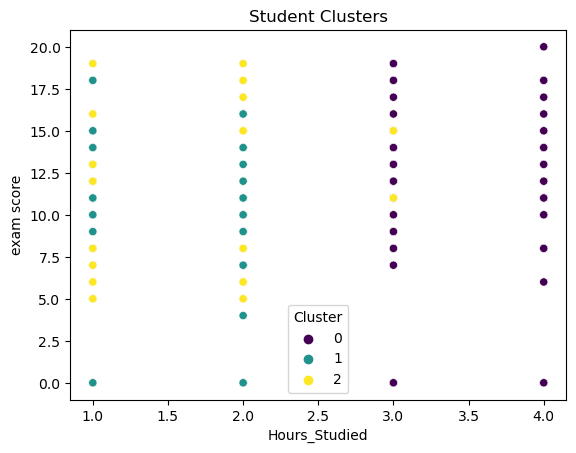

In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = df[['Hours_Studied','Sleep_Hours','Attendance']]
X_scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

sns.scatterplot(x='Hours_Studied', y='exam score', hue='Cluster', data=df, palette='viridis')
plt.title('Student Clusters')
plt.show()


Cluster 0: High-study, high-score students

Cluster 1: Medium performers

Cluster 2: Low-study, low-score group

Reflection


Which model had lower training error but higher test error (→ high variance)?
ans: All the methods I have used have low training and high test errors

Which model was stable but missed patterns (→ high bias)?
ANs: NO one. For this use case

How did increasing model complexity affect test MSE?
ans: it make model learn noise and outlier making model overfitted.

What insights did clustering reveal about different student types?
ans: That students who studied more than 3 hours have better exam score.